## Dependencias 

In [1]:
import kagglehub
import pandas as pd 
import os 
import seaborn as sns
import matplotlib.pyplot as plt

from CreditScoringToolkit import frequency_table
pd.set_option('display.max_columns', None)

In [2]:
!ls {path}

ls: {path}: No such file or directory


## Extract

In [3]:
path = kagglehub.dataset_download("solidsnake2301/cuestionario-de-conocimiento-pymes-mexicanas")
data = pd.read_csv(os.path.join(path,'sme_survey_mx_clean.csv'))

## Transform 

In [4]:
data.head(2)

,id,edadEmprendedor,sexoEmprendedor,escolaridadEmprendedor,dependientesEconomicos,estadoCivil,familiaAyuda,antiguedadNegocio,horaApertura,horaCierre,giroNegocio,numEmpleados,ventasPromedioDiarias,deseoNegocio,registroVentas,registroContabilidad,altaSAT,usaCredito,tiempoCreditoProveedores,promocionNegocio,latitud,longitud
0,E00000000,54,H,universidad trunca,3,casado,False,35.0,9,18,"servicios para el hogar (cerrajería, plomería,...",3,3500.0,eficacia,en un cuaderno,en un sistema especial,s,False,no me dan crédito,publicidad exterior|redes sociales (sin pagar)...,19.453446,-99.168899
1,E00000001,56,M,universidad terminado,2,viudo,False,37.0,8,15,comercio minorista de materias primas,3,4500.0,bodega,en excel,en excel,s,False,no me dan crédito,publicidad exterior|redes sociales (sin pagar),19.486575,-99.204668


### Categorización de variables 

In [5]:
um = ['id']
varc = ['edadEmprendedor','dependientesEconomicos','antiguedadNegocio','numEmpleados',
        'ventasPromedioDiarias'
        ]
vard = ['sexoEmprendedor','escolaridadEmprendedor','estadoCivil','familiaAyuda',
        'horaApertura','horaCierre','giroNegocio','registroVentas','registroContabilidad',
        'altaSAT','usaCredito','tiempoCreditoProveedores','promocionNegocio']

var_txt = ['deseoNegocio']

var_geo = ['latitud','longitud']

### Tipos de datos 

In [6]:
for v in varc:
    data[v] = pd.to_numeric(data[v], errors='coerce')

for v in vard:
    data[v] = data[v].astype(str)

for v in var_txt:
    data[v] = data[v].astype(str)

for v in var_geo:
    data[v] = pd.to_numeric(data[v], errors='coerce')

### Análisis exploratorio de datos|

#### Ausentes 

In [7]:
data[varc+vard+var_txt+var_geo].isna().sum()/len(data)

edadEmprendedor             0.000000
dependientesEconomicos      0.000000
antiguedadNegocio           0.000000
numEmpleados                0.000000
ventasPromedioDiarias       0.093785
sexoEmprendedor             0.000000
escolaridadEmprendedor      0.000000
estadoCivil                 0.000000
familiaAyuda                0.000000
horaApertura                0.000000
horaCierre                  0.000000
giroNegocio                 0.000000
registroVentas              0.000000
registroContabilidad        0.000000
altaSAT                     0.000000
usaCredito                  0.000000
tiempoCreditoProveedores    0.000000
promocionNegocio            0.000000
deseoNegocio                0.000000
latitud                     0.000000
longitud                    0.000000
dtype: float64

#### Continuas

##### Distribución de variables

In [8]:
data[varc].describe()

,edadEmprendedor,dependientesEconomicos,antiguedadNegocio,numEmpleados,ventasPromedioDiarias
count,885.000000,885.000000,885.000000,885.000000,802.000000
mean,46.376271,2.383051,12.712289,1.679096,2609.069825
std,12.892512,1.964373,11.861022,1.875920,3796.541079
min,19.000000,0.000000,0.002800,0.000000,0.000000
25%,37.000000,1.000000,3.000000,0.000000,600.000000
50%,47.000000,2.000000,9.000000,1.000000,1500.000000
75%,55.000000,3.000000,20.000000,2.000000,3000.000000
max,88.000000,22.000000,56.000000,17.000000,60000.000000


array([[<Axes: title={'center': 'edadEmprendedor'}>,
        <Axes: title={'center': 'dependientesEconomicos'}>],
       [<Axes: title={'center': 'antiguedadNegocio'}>,
        <Axes: title={'center': 'numEmpleados'}>],
       [<Axes: title={'center': 'ventasPromedioDiarias'}>, <Axes: >]],
      dtype=object)

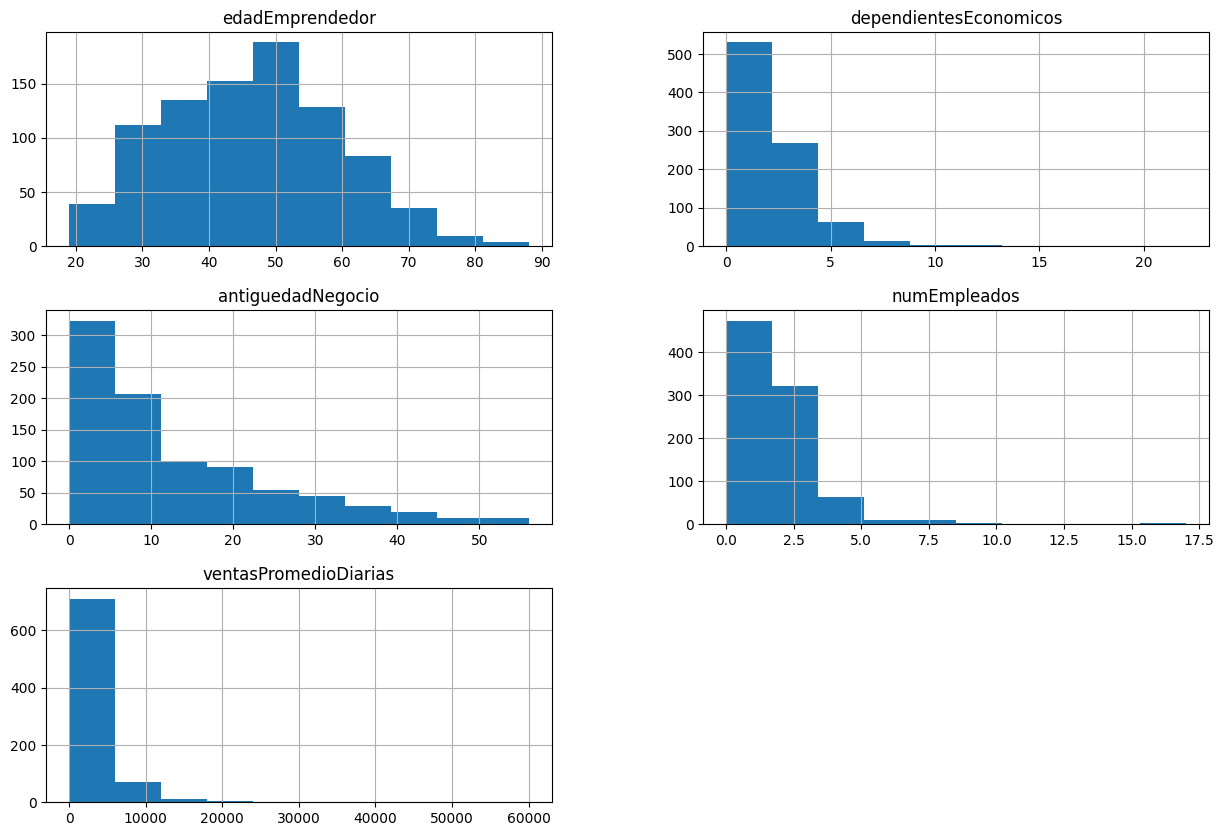

In [9]:
data[varc].hist(bins=10, figsize=(15, 10))

##### Correlaciones

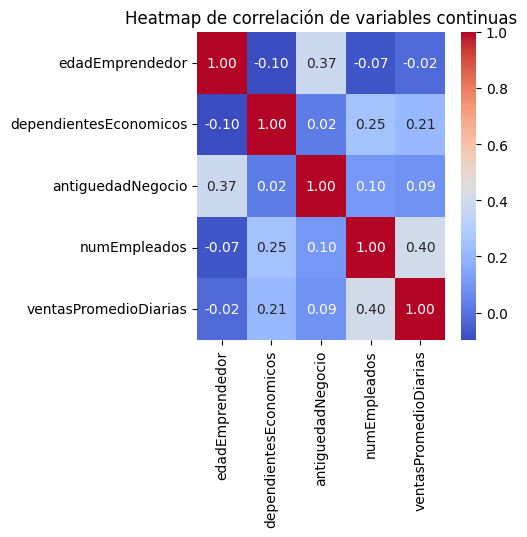

In [10]:
# Calculamos la matriz de correlación de las variables continuas
corr_matrix = data[varc].corr()

# Creamos el heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de correlación de variables continuas')
plt.show()


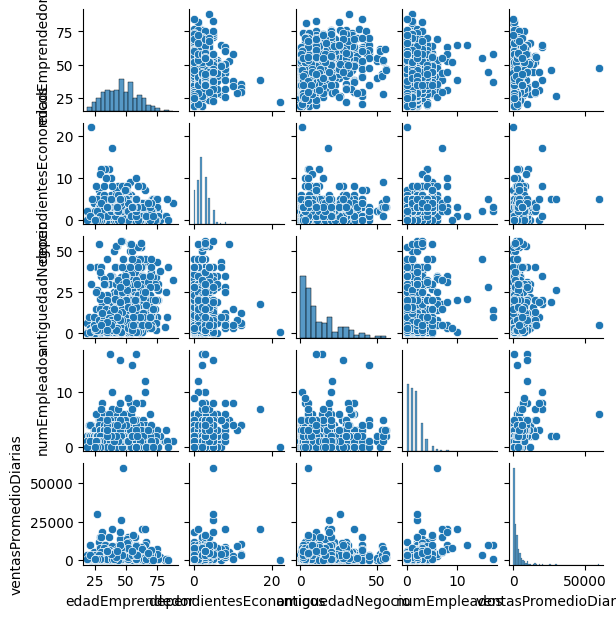

In [11]:
sns.pairplot(data[varc], height=1.25)

##### Extremos 

In [12]:
# Calculamos los extremos (valores mínimo y máximo "aceptables") para cada variable continua en varc
extremos = {}
for v in varc:
    p1 = data[v].quantile(0.01)
    p99 = data[v].quantile(0.99)
    extremos[v] = (p1, p99)

# Mostramos los resultados en formato legible
print("Extremos por el método de cerca percentil (1% y 99%) para cada variable continua:\n")
for v, (p1, p99) in extremos.items():
    print(f"- {v}:")
    print(f"    Percentil 1:  {p1:.2f}")
    print(f"    Percentil 99: {p99:.2f}")


Extremos por el método de cerca percentil (1% y 99%) para cada variable continua:

- edadEmprendedor:
    Percentil 1:  21.00
    Percentil 99: 75.16
- dependientesEconomicos:
    Percentil 1:  0.00
    Percentil 99: 9.16
- antiguedadNegocio:
    Percentil 1:  0.20
    Percentil 99: 52.00
- numEmpleados:
    Percentil 1:  0.00
    Percentil 99: 8.00
- ventasPromedioDiarias:
    Percentil 1:  5.00
    Percentil 99: 15990.00


#### Discretas 

##### Frecuencia 

In [13]:
frequency_table(data, vard)

**** Frequency Table for sexoEmprendedor ****

                 Abs. Freq.  Rel. Freq.  Cum. Abs. Freq.  Cum. Rel. Freq.
sexoEmprendedor                                                          
H                       445    0.502825              445         0.502825
M                       438    0.494915              883         0.997740
O                         2    0.002260              885         1.000000




**** Frequency Table for escolaridadEmprendedor ****

                        Abs. Freq.  Rel. Freq.  Cum. Abs. Freq.  \
escolaridadEmprendedor                                            
bachillerato terminado         228    0.257627              228   
bachillerato trunco            109    0.123164              337   
posgrado                        17    0.019209              354   
primaria                       104    0.117514              458   
secundaria                     238    0.268927              696   
universidad terminado          124    0.140113          

In [14]:
# Diccionario de recodificación para categorizar giros de negocio en 7 categorías

recod_giro_negocio = {
    # Servicios para el hogar y personales
    'servicios para el hogar (cerrajería, plomería, jardinería, etc)': 'Servicios',
    'servicios  personales(estéticas, spa, uñas, barberías, etc)': 'Servicios',
    'consultorios médicos, dentales, veterinarios': 'Servicios',
    'reparación de celulares.': 'Servicios',
    'estampados y publicidad.': 'Servicios',
    'planchaduría ': 'Servicios',
    'lonas y reparación ': 'Servicios',
    'planchaduría': 'Servicios',
    'frenos': 'Servicios',
    'escuela de manejo': 'Servicios',
    'vulcanizadora': 'Servicios',
    'pasteleria': 'Servicios',
    'costurero': 'Servicios',
    'mecánico ': 'Servicios',
    'sastrería ': 'Servicios',
    'publicidad ': 'Servicios',
    'purificadora de agua.': 'Servicios',
    'brujería': 'Servicios',
    'reparaciones electrónicas.': 'Servicios',
    'taller de motocicletas': 'Servicios',
    'reparadora de calzado ': 'Servicios',
    'reparadora de electrodomésticos ': 'Servicios',
    'herrajes y tlapalería': 'Servicios',
    'rosticeria ': 'Servicios',
    'servicios de reparación': 'Servicios',
    'automotriz': 'Servicios',
    'tintoreria y limpieza': 'Servicios',
    'academia de danza': 'Servicios',
    'despacho jurídico ': 'Servicios',
    'despacho contable': 'Servicios',
    'reparaciones celulares': 'Servicios',
    'estetica': 'Servicios',
    'estética ': 'Servicios',
    'salud y belleza': 'Servicios',
    'consultorio médico': 'Servicios',
    'consultorio dental': 'Servicios',
    'consultorio veterinario': 'Servicios',

    # Comercio minorista
    'comercio minorista de materias primas': 'Comercio',
    'comercio minorista de productos terminados': 'Comercio',
    'fonda o restaurante/alimentos': 'Comercio',
    'farmacia ': 'Comercio',
    'librería ': 'Comercio',
    'papelería ': 'Comercio',
    'cafe internet': 'Comercio',
    'negocio mercantil con giro comercial en venta de tortillas': 'Comercio',
    'cafe internet ': 'Comercio',
    'café internet ': 'Comercio',
    'café internet': 'Comercio',
    'manufacturera ': 'Comercio',
    'semillas ': 'Comercio',
    'calzado ': 'Comercio',
    'sandalias': 'Comercio',
    'tlapaleria  ': 'Comercio',
    'accesorios para mascotas ': 'Comercio',
    'rea pa uno de zapatos ': 'Comercio',
    'accesorios telefónicos ': 'Comercio',
    'tienda': 'Comercio',
    'regalos': 'Comercio',
    'pintura': 'Comercio',
    'verdulería ': 'Comercio',
    'productos decorativos ': 'Comercio',
    'cremeria ': 'Comercio',
    'banquetes': 'Comercio',
    'suspensiones y ruedas de méxico': 'Comercio',
    'accesorios para mascota': 'Comercio',
    'farmacia': 'Comercio',
    'cibercafé': 'Comercio',
    'pictórica': 'Comercio',
    'jarcería': 'Comercio',
    'telecomunicaciones ': 'Comercio',
    'zapatería ': 'Comercio',
    'bazar': 'Comercio',
    'abarrotes ': 'Comercio',
    'recaudería': 'Comercio',
    'recaudería ': 'Comercio',
    'internet ': 'Comercio',
    'ropa': 'Comercio',
    'de temporada': 'Comercio',
    'veterinaria': 'Comercio',
    'tortillería ': 'Comercio',
    'tortillería': 'Comercio',
    'panadería': 'Comercio',
    'frutas y verduras ': 'Comercio',
    'pollería ': 'Comercio',
    'pastelería ': 'Comercio',
    'bazar': 'Comercio',

    # Alimentos y bebidas
    'fonda o restaurante/alimentos': 'Alimentos y Bebidas',
    'pasteleria': 'Alimentos y Bebidas',
    'rosticeria ': 'Alimentos y Bebidas',
    'panadería': 'Alimentos y Bebidas',
    'tortillería ': 'Alimentos y Bebidas',
    'tortillería': 'Alimentos y Bebidas',
    'cremeria ': 'Alimentos y Bebidas',
    'banquetes': 'Alimentos y Bebidas',
    'repostería ': 'Alimentos y Bebidas',
    'pollería ': 'Alimentos y Bebidas',
    'frutas y verduras ': 'Alimentos y Bebidas',
    'abarrotes ': 'Alimentos y Bebidas',
    'verdulería ': 'Alimentos y Bebidas',
    'carnicería ': 'Alimentos y Bebidas',

    # Tecnología y comunicación
    'cafe internet': 'Tecnología',
    'cafe internet ': 'Tecnología',
    'café internet ': 'Tecnología',
    'café internet': 'Tecnología',
    'internet': 'Tecnología',
    'internet ': 'Tecnología',
    'telecomunicaciones ': 'Tecnología',
    'cibercafé': 'Tecnología',

    # Limpieza y productos para el hogar
    'jarceria, productos de limpieza': 'Limpieza y Hogar',
    'productos de limpieza ': 'Limpieza y Hogar',
    'artículos de limpieza ': 'Limpieza y Hogar',
    'tlapaleria  ': 'Limpieza y Hogar',
    'tlapaleria ': 'Limpieza y Hogar',
    'herrajes y tlapalería': 'Limpieza y Hogar',

    # Moda y accesorios
    'calzado ': 'Moda y Accesorios',
    'sandalias': 'Moda y Accesorios',
    'zapatería ': 'Moda y Accesorios',
    'rea pa uno de zapatos ': 'Moda y Accesorios',
    'accesorios para mascotas ': 'Moda y Accesorios',
    'accesorios para mascota': 'Moda y Accesorios',
    'accesorios telefónicos ': 'Moda y Accesorios',
    'ropa': 'Moda y Accesorios',

    # Otros (lo que no encaje en las anteriores)
    'manufacturera ': 'Otros',
    'pictórica': 'Otros',
    'bazar': 'Otros',
    'productos decorativos ': 'Otros',
    'de temporada': 'Otros',
    'regalos': 'Otros',
    'despacho jurídico ': 'Otros',
    'despacho contable': 'Otros',
    'academia de danza': 'Otros',
    'publicidad ': 'Otros',
    'estampados y publicidad.': 'Otros',
    'brujería': 'Otros',
    'sastrería ': 'Otros',
    'costurero': 'Otros',
    'consultorio médico': 'Otros',
    'consultorio dental': 'Otros',
    'consultorio veterinario': 'Otros',
}

# Si algún giro no está en el diccionario, se puede asignar 'Otros' por defecto:
# data['giroNegocio_cat'] = data['giroNegocio'].map(recod_giro_negocio).fillna('Otros')


In [15]:
data['giroNegocio_cat'] = data['giroNegocio'].map(recod_giro_negocio).fillna('Otros')

In [16]:
frequency_table(data,'giroNegocio_cat')

**** Frequency Table for giroNegocio_cat ****

                     Abs. Freq.  Rel. Freq.  Cum. Abs. Freq.  Cum. Rel. Freq.
giroNegocio_cat                                                              
Alimentos y Bebidas         164    0.185311              164         0.185311
Comercio                    493    0.557062              657         0.742373
Limpieza y Hogar              6    0.006780              663         0.749153
Moda y Accesorios            11    0.012429              674         0.761582
Otros                        15    0.016949              689         0.778531
Servicios                   187    0.211299              876         0.989831
Tecnología                    9    0.010169              885         1.000000






### Variables geográficas 

In [17]:
import folium

# Coordenadas aproximadas del centro de la Ciudad de México
cdmx_lat = 19.432608
cdmx_lon = -99.133209

# Crear el mapa centrado en la Ciudad de México
mapa_cdmx = folium.Map(location=[cdmx_lat, cdmx_lon], zoom_start=12)

# Definir las variables geográficas
var_geo = ['latitud', 'longitud']

# Validar que las columnas existen y no tienen valores nulos
if all(col in data.columns for col in var_geo):
    puntos = data.dropna(subset=var_geo)
    for _, row in puntos.iterrows():
        folium.CircleMarker(
            location=[row['latitud'], row['longitud']],
            radius=3,
            color='blue',
            fill=True,
            fill_opacity=0.6
        ).add_to(mapa_cdmx)
else:
    raise ValueError("Las columnas de variables geográficas no existen en el DataFrame.")

# Mostrar el mapa en el notebook
mapa_cdmx


In [18]:
def categorizar_hora(hora):
    hora = int(hora)
    if 0 <= hora <= 6:
        return "00. Madrugada"
    elif 7 <= hora <= 12:
        return "01. Mañana"
    elif 13 <= hora <= 18:
        return "02. Tarde"
    elif hora >= 19:
        return "03. Noche"
    else:
        return "Desconocido"

# Validar que las columnas existen y no tienen valores nulos
for col in ['horaApertura', 'horaCierre']:
    if col not in data.columns:
        raise ValueError(f"La columna {col} no existe en el DataFrame.")
    if data[col].isnull().any():
        raise ValueError(f"La columna {col} contiene valores nulos.")

data['horaApertura_cat'] = data['horaApertura'].apply(categorizar_hora)
data['horaCierre_cat'] = data['horaCierre'].apply(categorizar_hora)


In [19]:
frequency_table(data, ['horaApertura_cat','horaCierre_cat'])

**** Frequency Table for horaApertura_cat ****

                  Abs. Freq.  Rel. Freq.  Cum. Abs. Freq.  Cum. Rel. Freq.
horaApertura_cat                                                          
00. Madrugada             29    0.032768               29         0.032768
01. Mañana               817    0.923164              846         0.955932
02. Tarde                 35    0.039548              881         0.995480
03. Noche                  4    0.004520              885         1.000000




**** Frequency Table for horaCierre_cat ****

                Abs. Freq.  Rel. Freq.  Cum. Abs. Freq.  Cum. Rel. Freq.
horaCierre_cat                                                          
00. Madrugada           37    0.041808               37         0.041808
01. Mañana              84    0.094915              121         0.136723
02. Tarde              268    0.302825              389         0.439548
03. Noche              496    0.560452              885         1.000000






In [20]:
fuera = ['horaApertura','horaCierre','giroNegocio']
data.drop(columns=fuera, inplace=True)

In [21]:
data.head(2)

,id,edadEmprendedor,sexoEmprendedor,escolaridadEmprendedor,dependientesEconomicos,estadoCivil,familiaAyuda,antiguedadNegocio,numEmpleados,ventasPromedioDiarias,deseoNegocio,registroVentas,registroContabilidad,altaSAT,usaCredito,tiempoCreditoProveedores,promocionNegocio,latitud,longitud,giroNegocio_cat,horaApertura_cat,horaCierre_cat
0,E00000000,54,H,universidad trunca,3,casado,False,35.0,3,3500.0,eficacia,en un cuaderno,en un sistema especial,s,False,no me dan crédito,publicidad exterior|redes sociales (sin pagar)...,19.453446,-99.168899,Servicios,01. Mañana,02. Tarde
1,E00000001,56,M,universidad terminado,2,viudo,False,37.0,3,4500.0,bodega,en excel,en excel,s,False,no me dan crédito,publicidad exterior|redes sociales (sin pagar),19.486575,-99.204668,Comercio,01. Mañana,02. Tarde


## Carga

In [24]:
!mkdir data

In [25]:
data.to_parquet('data/sme_data.parquet')


In [ ]:
!bq load --source_format=PARQUET bi-jul-sep-2025.pymes.sme_data data/sme_data.parquet


In [28]:
from google.cloud import bigquery

# Validar que el archivo existe antes de cargar
import os
parquet_path = 'data/sme_data.parquet'
if not os.path.exists(parquet_path):
    raise FileNotFoundError(f"El archivo {parquet_path} no existe.")

# Inicializar el cliente de BigQuery
client = bigquery.Client()

# Definir el ID de la tabla de destino
table_id = "bi-jul-sep-2025.pymes.sme_data"

# Configurar el job de carga
job_config = bigquery.LoadJobConfig(
    source_format=bigquery.SourceFormat.PARQUET,
    write_disposition=bigquery.WriteDisposition.WRITE_TRUNCATE
)

# Ejecutar la carga
with open(parquet_path, "rb") as source_file:
    load_job = client.load_table_from_file(
        source_file,
        table_id,
        job_config=job_config,
    )

# Esperar a que termine el job y validar el resultado
load_job.result()  # Espera a que termine

# Validar que la tabla tenga filas después de la carga
table = client.get_table(table_id)
if table.num_rows == 0:
    raise ValueError("La tabla se cargó pero no contiene filas.")
else:
    print(f"Carga exitosa: {table.num_rows} filas en {table_id}")


Carga exitosa: 885 filas en bi-jul-sep-2025.pymes.sme_data
